# Regresión lineal

**SI3015 - Fundamentos de Aprendizaje Automático**

En este cuaderno entrenaremos regresiones lineales con regularización L1 y L2 y con características polinómicas, usando validación cruzada para seleccionar buenos hiperparámetros.

In [1]:
import numpy as np

from scipy.stats import reciprocal

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

In [2]:
# Definamos el "random_state" para que los resultados sean reproducibles:
random_state = 42
np.random.seed(random_state)

In [3]:
# Cambiemos la fuente de las gráficas de matplotlib:
plt.rc('font', family='serif', size=12)

In [4]:
# Definamos nuestro dataset:
X_linspace = np.linspace(0, 1, 500).reshape(-1,1)
X = np.random.uniform(low=0, high=1, size=(50, 1))
y_pure = np.sin(2*np.pi*X_linspace) + np.sin(3*np.pi*X_linspace)
y = np.sin(2*np.pi*X) + np.sin(3*np.pi*X) + np.random.normal(loc=0, scale=0.25, size=(50, 1))

In [5]:
# Separemos nuestros datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

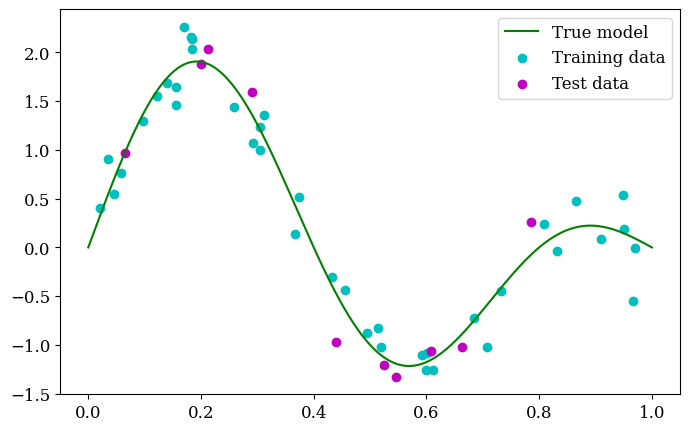

In [6]:
# Grafiquemos los datos junto con el modelo real:
fig, ax = plt.subplots()
ax.plot(X_linspace, y_pure, c='g', label='True model')
ax.scatter(X_train, y_train, c='c', label='Training data')
ax.scatter(X_test, y_test, c='m', label='Test data')
ax.legend()
fig.set_size_inches(1.6*5, 5)

In [7]:
# Definamos pipelines de scikit-learn con nuestros modelos base:

ridge_base = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

lasso_base = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])

In [8]:
# Definamos las distribuciones de parámetros sobre las que haremos la búsqueda:
param_distributions = {
    'poly__degree': list(range(2, 10)),
    'regressor__alpha': reciprocal(1e-5, 1e3)
}

In [9]:
# Definamos nuestros modelos mediante RandomizedSearchCV:

ridge = RandomizedSearchCV(
    ridge_base,
    cv=4,
    param_distributions=param_distributions,
    n_iter=200,
    random_state=random_state
)

lasso = RandomizedSearchCV(
    lasso_base,
    cv=4,
    param_distributions=param_distributions,
    n_iter=200,
    random_state=random_state
)

In [10]:
# Entrenemos los modelos:
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.737e+00, tolerance: 2.964e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.615e+00, tolerance: 3.282e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.162e+00, tolerance: 3.963e

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('poly',
                                              PolynomialFeatures(include_bias=False)),
                                             ('scaler', StandardScaler()),
                                             ('regressor', Lasso())]),
                   n_iter=200,
                   param_distributions={'poly__degree': [2, 3, 4, 5, 6, 7, 8,
                                                         9],
                                        'regressor__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ef78f5aa990>},
                   random_state=42)

In [11]:
# Obtengamos los mejores hiperparámetros encontrados para el modelo ridge:
ridge.best_params_

{'poly__degree': 6, 'regressor__alpha': np.float64(0.000694196062373459)}

In [12]:
# Obtengamos los mejores hiperparámetros encontrados para el modelo LASSO:
lasso.best_params_

{'poly__degree': 9, 'regressor__alpha': np.float64(1.2961002121959892e-05)}

In [13]:
# Obtengamos el R^2 y el MAE de prueba para el modelo ridge:
print('Modelo ridge')
print(f'R^2: {ridge.score(X_test, y_test)}')
print(f'MAE: {mean_absolute_error(y_test, ridge.predict(X_test))}')

Modelo ridge
R^2: 0.9332576687005575
MAE: 0.2844854314391655


In [14]:
# Obtenamos el R^2 y el MAE para el modelo LASSO:
print('Modelo LASSO')
print(f'R^2: {lasso.score(X_test, y_test)}')
print(f'MAE: {mean_absolute_error(y_test, lasso.predict(X_test))}')

Modelo LASSO
R^2: 0.8826381983381695
MAE: 0.39327941361612223


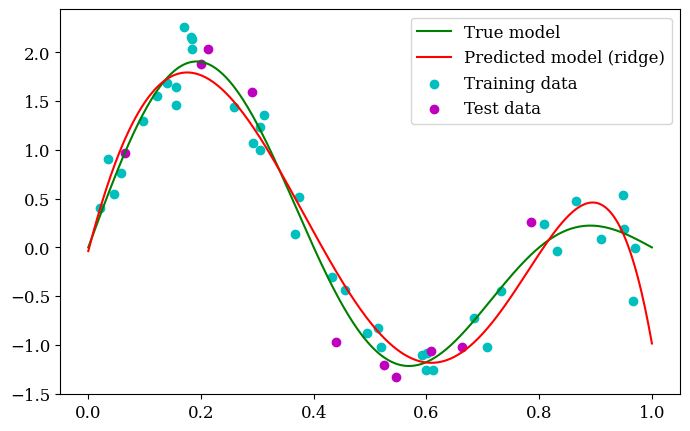

In [15]:
# Grafiquemos los datos junto con el modelo real y el modelo predicho por la regresión ridge:
fig, ax = plt.subplots()
ax.plot(X_linspace, y_pure, c='g', label='True model')
ax.plot(X_linspace, ridge.predict(X_linspace), c='r', label='Predicted model (ridge)')
ax.scatter(X_train, y_train, c='c', label='Training data')
ax.scatter(X_test, y_test, c='m', label='Test data')
ax.legend()
fig.set_size_inches(1.6*5, 5)

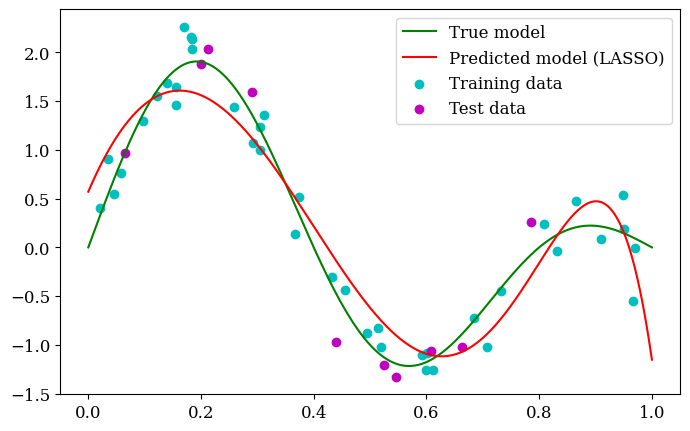

In [16]:
# Grafiquemos los datos junto con el modelo real y el modelo predicho por la regresión LASSO:
fig, ax = plt.subplots()
ax.plot(X_linspace, y_pure, c='g', label='True model')
ax.plot(X_linspace, lasso.predict(X_linspace), c='r', label='Predicted model (LASSO)')
ax.scatter(X_train, y_train, c='c', label='Training data')
ax.scatter(X_test, y_test, c='m', label='Test data')
ax.legend()
fig.set_size_inches(1.6*5, 5)

In [17]:
# Obtengamos los coeficientes y el intercepto de la regresión ridge:
print('Modelo ridge')
print(f"coeficientes: {ridge.best_estimator_['regressor'].coef_}")
print(f"intercepto: {ridge.best_estimator_['regressor'].intercept_}")

Modelo ridge
coeficientes: [  6.69678705 -22.80336739   7.7201472   15.93084005   4.58594958
 -12.56239719]
intercepto: [0.40373381]


In [18]:
# Obtengamos los coeficientes y el intercepto de la regresión LASSO:
print('Modelo LASSO')
print(f"coeficientes: {lasso.best_estimator_['regressor'].coef_}")
print(f"intercepto: {lasso.best_estimator_['regressor'].intercept_}")

Modelo LASSO
coeficientes: [  4.04184563 -14.53089554   5.46839414   5.60419824   2.75698266
   0.49814466  -0.83888511  -1.57853012  -1.89379348]
intercepto: [0.40373381]
